In [416]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import ipywidgets as wgt
from ipywidgets import interact, interactive, fixed, interact_manual
from sklearn.model_selection import train_test_split

In [417]:
def read_file(file_name):
    file=pd.read_csv(file_name)
    data=file.values

    x=data[:,1:]
    y=data[:,:1]    
    
    return x,y

In [418]:
def addColumnOfOnes(matrix):
    column_of_ones = np.ones((matrix.shape[0],1))
    matrix=np.append(column_of_ones,matrix,axis=1)
    return matrix

In [419]:
def select_two_numbers_to_train_on(first_value:int, second_value:int,x,y):
    aux=np.squeeze(np.asarray(y))
    x_filtr=x[(aux==first_value)|(aux==second_value),:]
    y_filtr=y[np.where((aux==first_value) | (aux==second_value))]
    return x_filtr,y_filtr

In [420]:
def scale(matrix):
    matrix_scl=(matrix-matrix.mean())/matrix.mean()
    #matrix_scl=matrix/255
    return matrix_scl

In [476]:
def accuracy(h, y_test):
    temp=[1 if x>0.5 else 0 for x in h]
    temp2=y_test==1
    confusionMatrix= np.zeros((2,2))
    for i in range (0,len(y_test)):
        if (temp[i]==temp2[i]==False):
            confusionMatrix[0,0]+=1
        elif(temp[i]==temp2[i]==True):
            confusionMatrix[1,1]+=1
        elif(temp[i]==False and temp2[i]==True):
            confusionMatrix[1,0]+=1
        else:
            confusionMatrix[1,0]+=1
    return confusionMatrix

In [422]:
def hypothesis(matrix, theta):    
    aux=np.dot(matrix,np.transpose(theta))
    aux=scale(aux)
    return 1/(1+np.exp(-aux)) 

In [423]:
def Kcost(x,y,theta):
    h=hypothesis(x,theta)
    m=y.shape[0]
    J=(y*np.log(h)+(1-y)*(np.log(1-h))).mean()
    return -J

def KcostReg(x,y,theta,hyper):
    h=hypothesis(x,theta)
    m=y.shape[0]
    J=(y*np.log(h)+(1-y)*(np.log(1-h))).mean()
    regularizare=(np.sum(np.power(theta,2))*hyper/2)
    return -J+regularizare

In [424]:
def gradient(matrix,y,h):
    return np.dot(np.transpose(matrix),(h-y))

In [425]:
def gradient_descent(x,y):
    theta=np.random.rand(1,x.shape[1]) 
    nr_it=50
    alfa=0.006
    m=y.shape[0]
    eroare=np.zeros(nr_it)
    for i in range (0,nr_it):
        h=hypothesis(x,theta)
        grad=gradient(x,y,h)
        ec=(alfa*grad.T)*(1/m)
        theta=theta-ec           
        eroare[i]=Kcost(x,y,theta.copy())
    return eroare,theta

def gradient_descent_reg(x,y):
    theta=np.random.rand(1,x.shape[1]) 
    nr_it=100
    hyper=0.001
    alfa=0.004214345
    m=y.shape[0]
    eroare=np.zeros(nr_it)
    for i in range (0,nr_it):
        h=hypothesis(x,theta)
        grad=gradient(x,y,h)
        ec=(alfa*grad.T)*(1/m)
        theta=theta-ec
        if i>0:
            eroare[i]=KcostReg(x,y,theta,hyper)
        else:
            eroare[i]=Kcost(x,y,theta)

    return eroare,theta

In [426]:
x_data,y_data=read_file("mnist_train.csv")

In [427]:
x_data_test,y_data_test=read_file("mnist_test.csv")

In [443]:
x_train,y_train=x_data,y_data

(12665, 785)


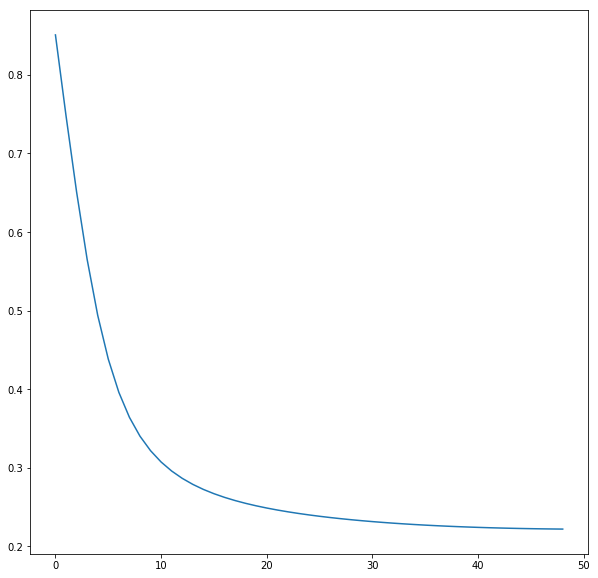

0.30842836233463067
y [[0]
 [1]
 [1]
 ...
 [1]
 [0]
 [1]]


In [444]:
first_value=0
second_value=1
x_train,y_train=select_two_numbers_to_train_on(first_value,second_value,x_train,y_train)
x_train=addColumnOfOnes(x_train)
print(x_train.shape)
#x_train=scale(x_train)

eroare,theta=gradient_descent_reg(x_train,y_train)
plt.figure(figsize=(10,10))
plt.plot(eroare[1:])
plt.show()

h=hypothesis(x_train,theta)
print(np.mean(eroare))
print('y',y_train)




In [480]:
x_test,y_test=x_data_test,y_data_test
x_test,y_test=select_two_numbers_to_train_on(first_value,second_value,x_test,y_test)
x_test=addColumnOfOnes(x_test)

eroare,theta=gradient_descent_reg(x_test,y_test)

h=hypothesis(x_test,theta)
#print("contor",accuracy(h,y_test))
print(np.mean(h), len(y_test))
matrixConf=accuracy(h,y_test)
#print('y hereeeeeeeeee',y_test)
print((matrixConf[0,0]+matrixConf[1,1])/(len(y_test)))
print(matrixConf)

0.5332014950989967 2115
0.9981087470449173
[[ 976.    0.]
 [   4. 1135.]]
